# 卷积

卷积计算结果：
y[0] = 2.0
y[1] = 7.0
y[2] = 10.0
y[3] = 15.0
y[4] = 14.0
y[5] = 10.0
y[6] = 4.0
y[7] = 1.0


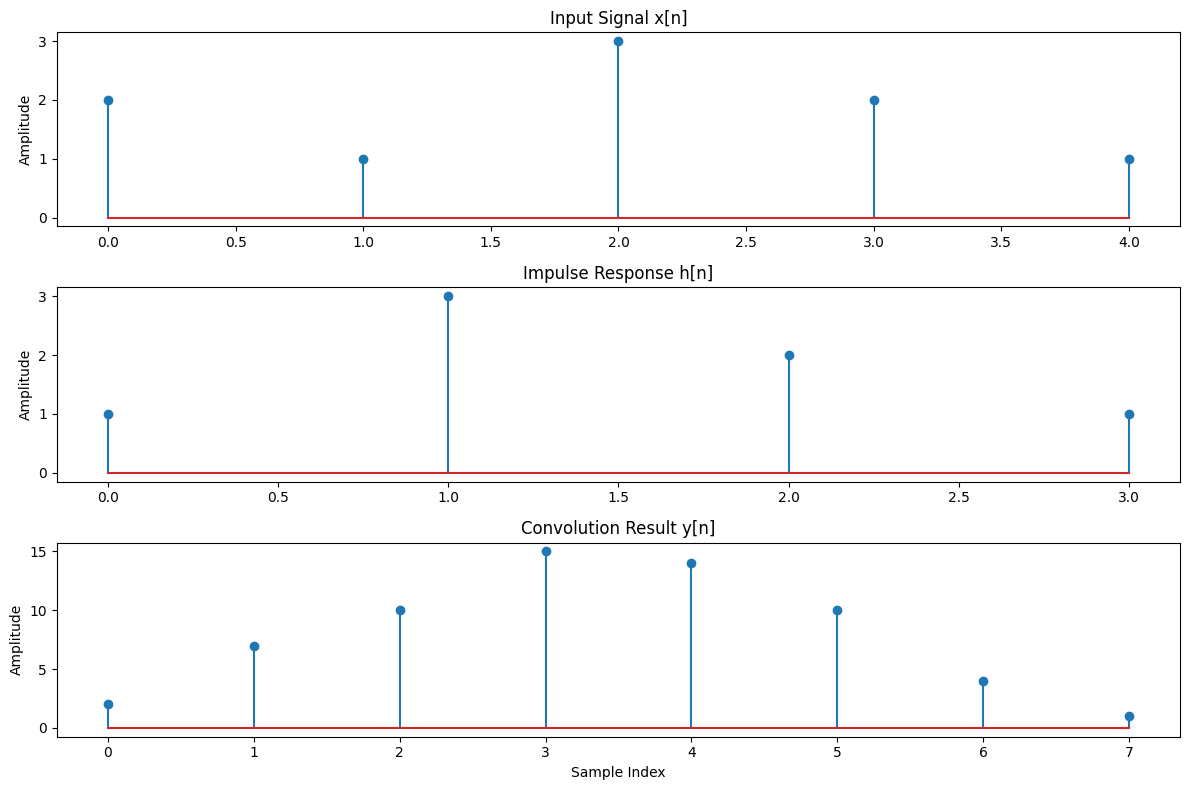

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义卷积函数
def convolution(x, h):
    Nx = len(x)
    Nh = len(h)
    y = np.zeros(Nx + Nh - 1)
    for n in range(len(y)):
        for k in range(max(0, n - Nh + 1), min(n + 1, Nx)):
            y[n] += x[k] * h[n - k]
    return y

x = np.array([2, 1, 3, 2, 1])
h = np.array([1, 3, 2, 1])

y = convolution(x, h)
print("卷积计算结果：")
for i, value in enumerate(y):
    print(f"y[{i}] = {value}")

plt.figure(figsize=(12, 8))

# 输入信号
plt.subplot(3, 1, 1)
plt.stem(np.arange(len(x)), x)
plt.title('Input Signal x[n]')
plt.ylabel('Amplitude')

# 脉冲响应
plt.subplot(3, 1, 2)
plt.stem(np.arange(len(h)), h)
plt.title('Impulse Response h[n]')
plt.ylabel('Amplitude')

# 卷积结果
plt.subplot(3, 1, 3)
plt.stem(np.arange(len(y)), y)
plt.title('Convolution Result y[n]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 平均滤波器

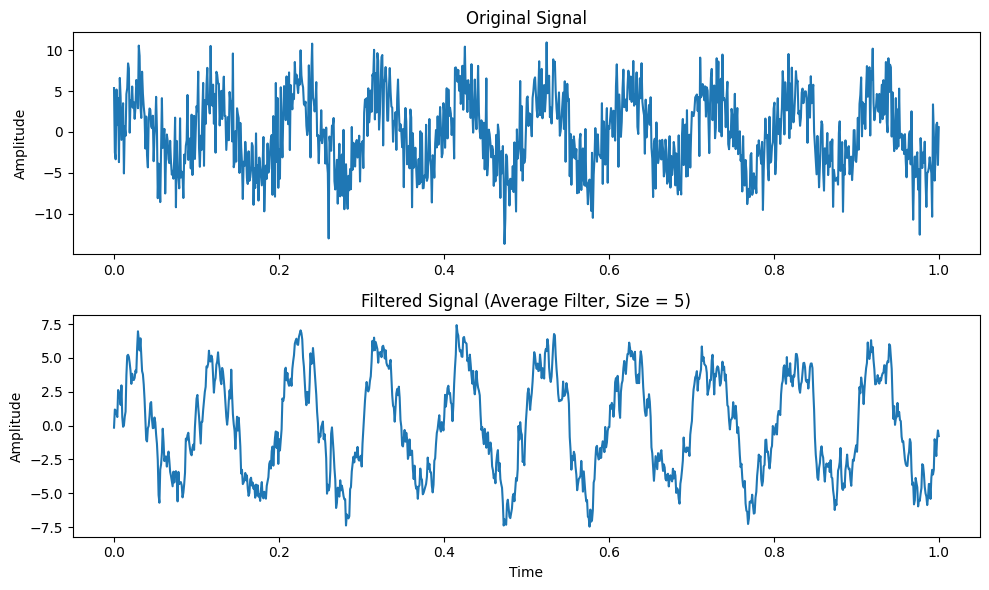

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成滤波前的信号
t = np.linspace(0, 1, 1000)
original_signal = 5 * np.sin(2 * np.pi * 10 * t) + 3 * np.random.randn(1000)

# 定义平均滤波器函数
def average_filter(signal, filter_size):
    filtered_signal = np.zeros_like(signal)
    for i in range(len(signal)):
        start = max(0, i - filter_size // 2)
        end = min(len(signal), i + filter_size // 2 + 1)
        filtered_signal[i] = np.mean(signal[start:end])
    return filtered_signal

# 使用平均滤波器滤波（滤波器大小为5）
filtered_signal = average_filter(original_signal, 5)

plt.figure(figsize=(10, 6))

# 滤波前信号
plt.subplot(2, 1, 1)
plt.plot(t, original_signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')

# 滤波后信号
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Average Filter, Size = 5)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# 高斯滤波器

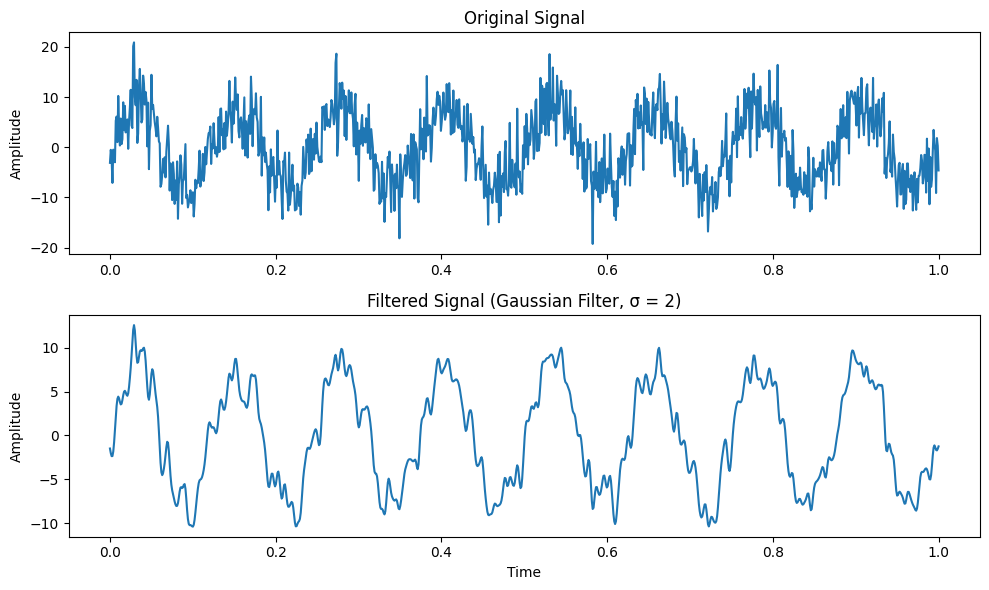

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# 生成滤波前的信号
t = np.linspace(0, 1, 1000)
original_signal = 8 * np.sin(2 * np.pi * 8 * t) + 4 * np.random.randn(1000)

# 设置高斯滤波器参数
sigma = 2
filter_size = 6 * sigma + 1

# 生成高斯滤波器系数
gauss = signal.gaussian(filter_size, sigma)
# 归一化滤波器系数
gauss = gauss / np.sum(gauss)

# 使用高斯滤波器滤波
filtered_signal = np.convolve(original_signal, gauss,'same')

# 可视化滤波前和滤波后的信号
plt.figure(figsize=(10, 6))

# 滤波前信号
plt.subplot(2, 1, 1)
plt.plot(t, original_signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')

# 滤波后信号
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title(f'Filtered Signal (Gaussian Filter, σ = {sigma})')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()